# <font color='blue'>A GENTLE INTRODUCTION TO LSTM</font>

In [8]:
import keras
import numpy as np
from keras import layers
from keras import backend as K
import pylab as plt

Using TensorFlow backend.


In [2]:
# LSTM 1: SUM OF POWERS OF TWO (binary numbers of n '1's)
model = keras.models.Sequential()

values1=[1, 1, 1, 1]
values2=[0, 0, 0, 0]
activation1='linear'
activation2='linear'

def kernel_init(shape, dtype=None):
    var=K.ones(shape)
    K.set_value(var, matrix)
    return var

matrix=np.ones((1, 4))

for i, index in enumerate([1, 0, 2, 3]):
    matrix[0][i]=values1[index]
            
model.add(layers.LSTM(
1, 
kernel_initializer=kernel_init, 
recurrent_initializer='zeros', 
return_sequences='True', 
activation='linear', 
recurrent_activation='linear', 
input_shape=(10, 1)))

x_input = np.ones((1, 10, 1))
y=model.predict(x_input).astype(int)
print(y)


[[[   1]
  [   3]
  [   7]
  [  15]
  [  31]
  [  63]
  [ 127]
  [ 255]
  [ 511]
  [1023]]]


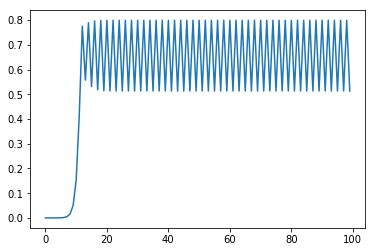

In [3]:
# LSTM 2: LOGISTIC MAP
model = keras.models.Sequential()
                                       
# OPTIONS 
r=3.2  #  0<r<4, critical values: r=1, r=3, r=3.569946... 

values1=[r-1, 0.001, 0.001, 1]
values2=[-r, 0, 0, 0]
activation1='linear'
activation2='linear'

def kernel_init(shape, dtype=None):
    var=K.ones(shape)
    K.set_value(var, matrix)
    return var
def rec_init(shape, dtype=None):
    var2=K.ones(shape)
    K.set_value(var2, matrix2)
    return var2

matrix=np.ones((1, 4))
matrix2=np.ones((1, 4))

for i, index in enumerate([1, 0, 2, 3]):
    matrix[0][i]=values1[index]
    matrix2[0][i]=values2[index]

model.add(layers.LSTM(
1, 
kernel_initializer=kernel_init, 
recurrent_initializer=rec_init, 
return_sequences='True', 
activation=activation1, 
recurrent_activation=activation2, 
input_shape=(100, 1)))
optimizer = keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

x_input = np.ones((1, 100, 1))
y=model.predict(x_input)
plt.plot(y[0])
plt.show()

In [4]:
# LSTM 3: HELLO

print('h')
model = keras.models.Sequential()
                                       
# OPTIONS 
# H: 1 0 0 0
# E: 0 1 0 0
# L: 0 0 1 0
# O: 0 0 0 1

char_indices = {0:'h', 1:'e', 2:'l', 3:'o'}
x_input = np.zeros((1, 4, 4))
x_input[0,0,0]=1

values=np.zeros((4, 20))

# H->E
values[1:4]=[0, 1, 0, 0, 0,
             0, 0, 0, 0, 0,
             0, 0, 0, 0, 0,
             0, 0, 0, 0, 0]

values2=np.zeros((4, 25))

# E->L
values2[1:4]= [0, 0, 0, 0, 0,
               0, 0, 1, 0, 0,
               0, 0, 0, 0, 0,
               0, 0, 0, 0, 0,
               0, 0, 0, 0, 0]

# L->L, bit
values2[1:4]+=[0, 0, 0, 0, 0,
               0, 0, 0, 0, 0,
               0, 0, 1, 0, 1,
               0, 0, 0, 0, 0,
               0, 0, 0, 0, 0]
# LL->O
values2[1:4]+=[0, 0, 0, 0, 0,
               0, 0, 0, 0, 0,
               0, 0, 0, 0, 0,
               0, 0, 0, 0, 0,
               0, 0,-1, 1, 0]

values2[0]=-1

values[[0, 1],:]=values[[1, 0],:]
values=values.reshape((4, 4, 5)).swapaxes(0, 1).reshape((4, 20))
values2[[0, 1],:]=values2[[1, 0],:]
values2=values2.reshape((4, 5, 5)).swapaxes(0, 1).reshape((5, 20))

activation1='linear'
activation2='linear'

def kernel_init(shape, dtype=None):
    var=K.ones(shape)
    K.set_value(var, matrix)
    return var

def rec_init(shape, dtype=None):
    var=K.ones(shape)
    K.set_value(var, matrix2)
    return var
matrix=np.ones((4, 20))
matrix2=np.ones((5, 20))

for i in range(20):
    for j in range(4):
        matrix[j][i]=values[j][i]
    for k in range(5):
        matrix2[k][i]=values2[k][i]

model.add(layers.LSTM(
5, 
kernel_initializer=kernel_init, 
recurrent_initializer=rec_init,
return_sequences='True', 
activation=activation1, 
unit_forget_bias='False',
recurrent_activation=activation2, 
input_shape=(4, 4)))
optimizer = keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

y=model.predict(x_input)

for i in range(4):
    print (char_indices[np.argmax(y[0][i])])
print()
for i in range(4):
    print(y[0][i][0:4])

h
e
l
l
o

[ 0.  1.  0.  0.]
[ 0.  0.  1.  0.]
[ 0.  0.  1.  0.]
[ 0.  0. -0.  1.]


In [5]:
# LSTM4: CICERO'S TUSCULANAE DISPUTATIONES

In [95]:
text = open('cicero_data.txt').read().lower().replace('\n', '').replace('-','')
print('Corpus length:', len(text))

Corpus length: 487062


In [96]:
inputs = []  
targets = []
timestep = 30

for i in range(len(text) - timestep-1):
    inputs.append(text[i: i + timestep])
    targets.append(text[i + timestep])


In [97]:
chars = sorted(list(set(text))) 
char_indices = dict((char, chars.index(char)) for char in chars) 
char2_indices = dict((chars.index(char), char) for char in chars)
print('Unique characters:', chars)
print(len(chars))

Unique characters: [' ', '!', '"', '%', '&', "'", '(', ')', '*', ',', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '>', '?', '[', '\\', ']', '^', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '£', '¦', '§', '«', '»', '—', '„', '•', '€']
69


In [98]:
model = keras.models.Sequential()
model.add(layers.LSTM(
128, 
input_shape=(timestep, len(chars)),
# kernel_initializer='ones',
activation = 'sigmoid',
recurrent_activation ='tanh'
))
model.add(layers.Dense(len(chars), activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 128)               101376    
_________________________________________________________________
dense_12 (Dense)             (None, 69)                8901      
Total params: 110,277
Trainable params: 110,277
Non-trainable params: 0
_________________________________________________________________
None


In [99]:
inputs = inputs[0:400]

In [100]:
optimizer = keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

x = np.zeros((len(inputs), timestep, len(chars)), dtype=np.bool)
y = np.zeros((len(inputs), len(chars)), dtype=np.bool)

for i, sentence in enumerate(inputs):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[targets[i]]] = 1

In [101]:
model.fit(x, y,
    batch_size=128,
    epochs=60)

Epoch 1/60
400/400 [==============================] - 2s 5ms/step - loss: 3.8942
Epoch 2/60
400/400 [==============================] - 1s 1ms/step - loss: 3.1150
Epoch 3/60
400/400 [==============================] - 0s 1ms/step - loss: 3.7016
Epoch 4/60
400/400 [==============================] - 0s 1ms/step - loss: 3.1256
Epoch 5/60
400/400 [==============================] - 0s 1ms/step - loss: 2.9653
Epoch 6/60
400/400 [==============================] - 1s 2ms/step - loss: 3.0185
Epoch 7/60
400/400 [==============================] - 1s 1ms/step - loss: 2.9400
Epoch 8/60
400/400 [==============================] - 1s 1ms/step - loss: 2.9554
Epoch 9/60
400/400 [==============================] - 1s 1ms/step - loss: 2.8859
Epoch 10/60
400/400 [==============================] - 1s 2ms/step - loss: 2.8358
Epoch 11/60
400/400 [==============================] - 1s 1ms/step - loss: 2.8150
Epoch 12/60
400/400 [==============================] - 1s 1ms/step - loss: 2.7249
Epoch 13/60
400/400 [====

In [94]:
model.save('new_modelkernel.model')

In [ ]:
model_nr = 60
model = keras.models.load_model('new_model%d.model' % model_nr)

In [102]:
import sys
initial_text = "ciao mamma come sei bella cosi"
initial_text = "hello mom, you are really nice"
initial_text = '1. at a period when i was enti'
text = initial_text
sys.stdout.write(text)

for i in range(400):
    new_input = np.zeros((1, timestep, len(chars)))
    for t, char in enumerate(text):
        new_input[0, t, char_indices[char]] = 1.
    a = char2_indices[np.argmax(model.predict(new_input)[0])]
    text += a
    text = text[1:]
    sys.stdout.write(a)

1. at a period when i was entirely or in great part released from my labors as an advocate and my duties as a senator, chiefly by your advice, bru tus, i betook myself again to those pursuits which, never out of mind, though suspended by the de mands upon my time, i renewed after a long inter val ; and since the theory and practice of the arts that belong to the right mode of living are com prised in the study of that wisdom w

Impressive: there are 69^400 possible texts, and only 101 376 weights to learn 

essential settings: 60 epochs, sigmoid, tanh
kernel_initializer: 